<div style="background-color:#600170; color:#fff; padding:10px; border-radius:5px; display: flex; justify-content: center; align-items: center; position: relative;">
    <div style="font-size:60px; font-weight:bold;">Exploratory Data Analysis</div>
</div>
<br>
<p>Tijdens de testdagen op vrijdag is er ook de mogelijkheid om data op te nemen van de kart. In dit bestand wordt er dieper in de data gedoken en zal er worden gekeken hoe de opgenomen data in elkaar steekt.<p>

-- Inhoudsopgave? --

<div style="background-color:#600170; color:#fff; padding:10px; border-radius:5px; display: flex; justify-content: center; align-items: center; position: relative;">
    <div style="font-size:40px; font-weight:bold;">Inladen van libaries en data</div>
</div>
<br>
<p>Om de data te kunnen onderzoeken is het belangrijk dat alle nodige libaries ervoor worden geinstalleerd.<p>

In [4]:
# Importeren standaard libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importeren libaries voor inladen
from PIL import Image
import os
import cv2

Aan de hand van deze libaries zou het mogelijk moeten zijn om de bestanden in te laden. De bestanden die worden opgenomen met de kart zijn te vinden op een externe harde schrijf. Om het inladen van de huidige en toekomstige data makkelijker te maken, is er een functie aangemaakt.

In [5]:
## HUIDIGE FUNCTIE TE ZWAAR VOOR JE LAPTOP
## BIJ LADEN VAN 15-03
def data_loader(folder_locatie):
    """
    Deze functie laad data in door middel van een folder locatie.
    Aan de hand van deze locatie kan de functie het CSV bestand en
    de afbeeldingen van elke camera inladen.

    Parameters:
    ----------
    folder_locatie : str
        Pad naar de folder op de SSD.

    Returns:
    ----------
    df : pd.DataFrame
        Een dataframe met de CSV bestanden.

    front : dict
        Een dictionary met de structuur bestandsnaam : afbeelding,
        voor de middelste camera.

    left : dict
        Een dictionary met de structuur bestandsnaam : afbeelding,
        voor de linker camera.

    right : dict
        Een dictionary met de structuur bestandsnaam : afbeelding,
        voor de rechter camera.
    """
    # Inladen van het csv bestand
    df = pd.read_csv(f"{folder_locatie}/recording.csv")
    
    # Aanmaken dicts voor afbeeldingen
    front = {}
    left = {}
    right = {}

    # Inladen van de afbeeldingen
    for folder, image in [
        (f"{folder_locatie}/front", front),
        (f"{folder_locatie}/left", left),
        (f"{folder_locatie}/right", right)
        ]:
        print(f"Loading images from folder: {folder}")
        num_images_loaded = 0
        num_images_total = len(os.listdir(folder))
        for filename in os.listdir(folder):
            if filename.endswith('.png'):
                image_loc = os.path.join(folder, filename)
                try:
                    img = Image.open(image_loc)
                    image[filename] = img
                    img.close()
                    num_images_loaded += 1
                    print(f"Loaded image {num_images_loaded} from {num_images_total} from folder: {folder}")
                except Exception as e:
                    print(f"Error loading image {filename}: {e}")
        print(f"Finished loading {num_images_loaded} out of {num_images_total} images from folder: {folder}")
    
    return df, front, left, right

In [6]:
## df, front, left, right = data_loader("D:/recording 15-03")

In [7]:
df = pd.read_csv("D:/recording 15-03/recording.csv", sep="|")

In [8]:
# Tonen van basis informatie in DataFrame
print("Basis informatie DataFrame:")
display(df.info())

# Opsomming van statistieken
print("\nOpsomming van statistieken:")
display(df.describe())

# Eerste vij rijen tonen
print("\nEerste rijen in DataFrame:")
display(df.head())

Basis informatie DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74222 entries, 0 to 74221
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       74221 non-null  float64
 1   Steering        71853 non-null  float64
 2   SteeringSpeed   71853 non-null  float64
 3   Throttle        71853 non-null  float64
 4   Brake           71853 non-null  float64
 5   SteeringSensor  74221 non-null  float64
dtypes: float64(6)
memory usage: 3.4 MB


None


Opsomming van statistieken:


,Timestamp,Steering,SteeringSpeed,Throttle,Brake,SteeringSensor
count,7.422100e+04,71853.000000,71853.0,71853.000000,71853.000000,74221.000000
mean,1.710498e+09,-0.036074,49920.0,0.675270,0.028307,-26.688606
std,7.160498e+02,0.441832,0.0,0.461674,0.163768,254.300138
min,1.710497e+09,-1.000000,49920.0,0.000000,0.000000,-728.000000
25%,1.710497e+09,0.000000,49920.0,0.000000,0.000000,-18.000000
50%,1.710498e+09,0.000000,49920.0,1.000000,0.000000,0.000000
75%,1.710498e+09,0.000000,49920.0,1.000000,0.000000,4.000000
max,1.710499e+09,0.999970,49920.0,1.000000,1.000000,725.000000



Eerste rijen in DataFrame:


,Timestamp,Steering,SteeringSpeed,Throttle,Brake,SteeringSensor
0,1.710497e+09,NaN,NaN,NaN,NaN,-18.0
1,1.710497e+09,NaN,NaN,NaN,NaN,-18.0
2,1.710497e+09,NaN,NaN,NaN,NaN,-18.0
3,1.710497e+09,NaN,NaN,NaN,NaN,-18.0
4,1.710497e+09,NaN,NaN,NaN,NaN,-18.0


Er zijn missende en nulwaarden in de data. Hier moet naar gekeken worden om begrip te ontwikkelen om te begrijpen wat de nulwaarden betekenen.

In [9]:
def image_overview(folder, image, df):
    """
    
    """
    img_front = Image.open(f"{folder}/front/{image}.png")
    img_left = Image.open(f"{folder}/left/{image}.png")
    img_right = Image.open(f"{folder}/right/{image}.png")

    # Ophalen van de dimensies van de afbeelding
    dimensions = {
        "Left": {"size": img_left.size, "mode": img_left.mode},
        "Front": {"size": img_front.size, "mode": img_front.mode},
        "Right": {"size": img_right.size, "mode": img_right.mode}
    }

    # Tonen van afbeeldingen en informatie
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for ax, (title, data) in zip(axs, dimensions.items()):
        ax.imshow(eval(f"img_{title.lower()}"))
        ax.axis('off')
        ax.set_title(f"{title}\nSize: {data['size']}\nMode: {data['mode']}")

    plt.tight_layout()
    plt.show()

    # Tonen van de bijbehorende data
    display(df[df["Timestamp"] == image])

Kijken welke data bij de afbeelding hoort.

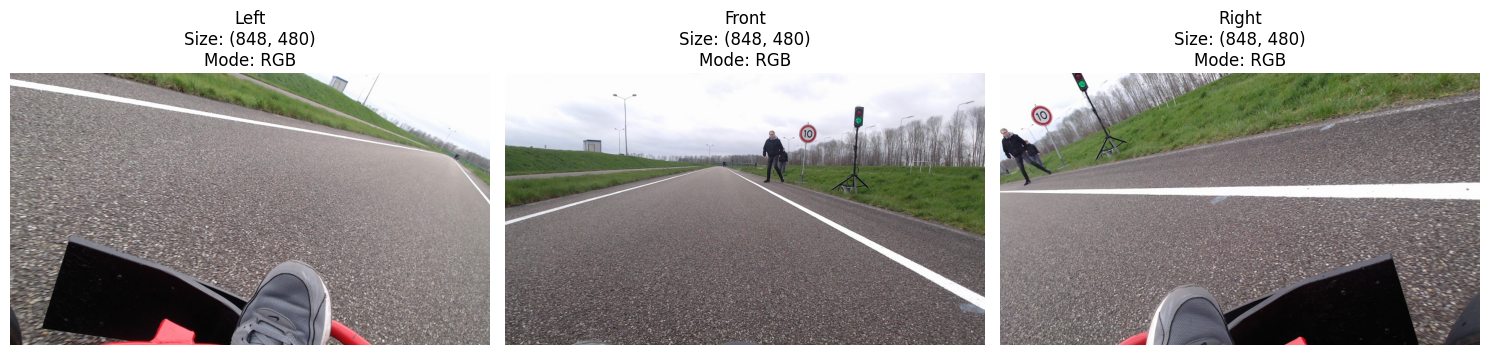

,Timestamp,Steering,SteeringSpeed,Throttle,Brake,SteeringSensor
49352,1.710498e+09,-0.20539,49920.0,1.0,0.0,-86.0


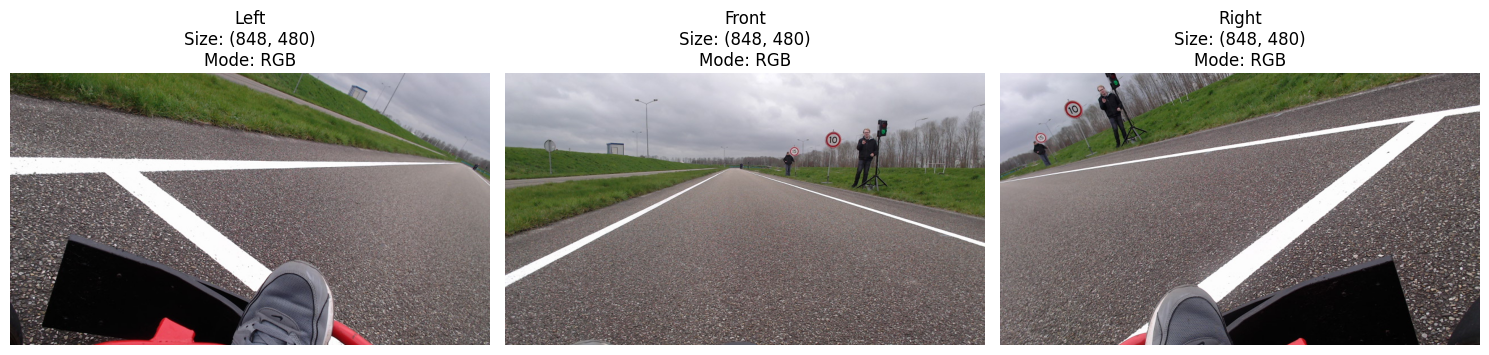

,Timestamp,Steering,SteeringSpeed,Throttle,Brake,SteeringSensor
60841,1.710499e+09,0.0,49920.0,1.0,0.0,3.0


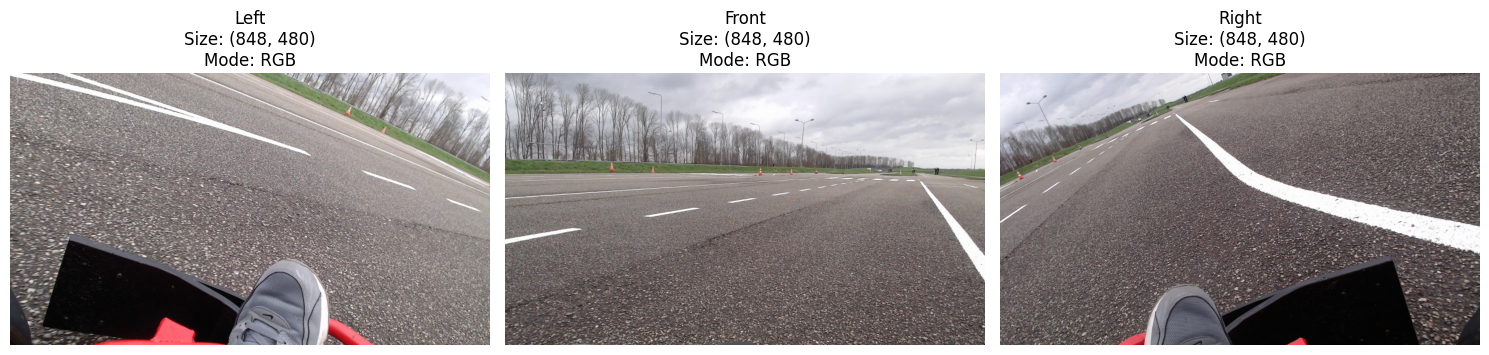

,Timestamp,Steering,SteeringSpeed,Throttle,Brake,SteeringSensor
57354,1.710499e+09,0.44509,49920.0,0.89,0.0,272.0


In [10]:
folder = "D:/recording 15-03"
image = 1710498235.9130464
image2 = 1710498619.8736014
image3 = 1710498503.3390074

image_overview(folder, image, df)
image_overview(folder, image2, df)
image_overview(folder, image3, df)

In [11]:
def data_selection(df, start, end):
    """
    
    """
    # Selecteer de data binnen de range van waarden
    data = df[(df['Timestamp'] >= start) & (df['Timestamp'] <= end)]

    return data

In [12]:
data = data_selection(df, 1710498415, 1710498524)
len(data)

3262

In [13]:
def load_images(df, image_folder):
    """
    
    """
    # Maken van image dict
    images = {}

    # Loopen over df voor timestamps
    for index, row in df.iterrows():
        timestamp = str(row['Timestamp'])
        # Maken van de filepath
        image_path = f"{image_folder}/{timestamp}.png"
        try:
            # Inladen van de image en opslaan
            img = Image.open(image_path)
            images[timestamp] = img
        except FileNotFoundError:
            pass
    return images

In [14]:
images = load_images(data, "D:/recording 15-03/front")

In [15]:
len(images)

2842

In [21]:
def img_to_vid(images, output_vid_pad, fps=30.0):
    """
    
    """
    # Verkrijg de dimensies van de afbeeldingen
    timestamp, first_image = next(iter(images.items()))
    width, height = first_image.size
    size = (width, height)

    # Aanmaken van de videowriter
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_vid_pad, fourcc, fps, size)

    # Itereren door de afbeeldingen en schrijf ze naar de video
    for timestamp, image in images.items():
        # omzetten van afbeelding naar numpy array om frame te maken
        frame = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
        out.write(frame)

    # Finish!!!!
    out.release()

In [22]:
img_to_vid(images, "Testvid-30.mp4")